In [1]:
# Adapted from https://raw.githubusercontent.com/sagieppel/Train_Mask-RCNN-for-object-detection-in_In_60_Lines-of-Code/main/train.py

# Example plot of a mask against an image
import os
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
import torch.utils.data
import cv2
import os
import torch

In [55]:
imagePath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis"

In [56]:
#trainDir="LabPicsChemistry/Train"
 
current_directory = os.getcwd()
print(current_directory)

sample_images = os.path.join(imagePath, 'Data', 'synth', 'images', '')
sample_masks = os.path.join(imagePath, 'Data', 'synth', 'masks', '')


imgs=[]
for pth in os.listdir(sample_images):
    #imgs.append(sample_images+"/"+pth +"//")
    imgs.append(pth )
    
    
print(imgs)    

c:\Users\dezos\Documents\Fibres\FibreAnalysis\ImageCreation
['image_2023-06-23_18-25-29-244708.png', 'image_2023-06-23_18-45-03-096709.png', 'image_2023-06-23_18-45-03-974057.png', 'image_2023-06-23_18-45-04-221003.png', 'image_2023-06-23_18-45-04-402481.png', 'image_2023-06-23_18-45-04-720862.png', 'image_2023-06-23_18-45-04-998147.png', 'image_2023-06-23_18-45-05-192524.png', 'image_2023-06-23_18-45-05-461928.png', 'image_2023-06-23_18-45-05-657419.png', 'image_2023-06-23_18-45-05-726849.png', 'image_2023-06-23_18-45-05-987565.png', 'image_2023-06-23_18-45-06-183277.png', 'image_2023-06-23_18-45-06-470363.png', 'image_2023-06-23_18-45-06-721102.png', 'image_2023-06-23_18-45-06-949240.png', 'image_2023-06-23_18-45-07-206447.png', 'image_2023-06-23_18-45-07-510072.png', 'image_2023-06-23_18-45-07-629033.png', 'image_2023-06-23_18-45-07-906012.png', 'image_2023-06-23_18-45-08-120566.png', 'image_2023-06-23_18-45-08-178770.png', 'image_2023-06-23_18-45-08-423546.png', 'image_2023-06-23_1

In [3]:
imagePath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\images\image_2023-06-23_18-25-29-244708.png"

maskPath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\masks\mask_2023-06-23_18-25-29-244708.png"

imageSize=[600,600]
batch_Imgs=[]
batch_Data=[]
masks=[]


img = cv2.imread(imagePath)
img = cv2.resize(img, imageSize, cv2.INTER_LINEAR)

vesMask = cv2.imread(maskPath, 0)
vesMask = (vesMask > 0).astype(np.uint8) 
vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
masks.append(vesMask)        
num_objs = len(masks)

if num_objs==0: print('no box found')




In [52]:

import random
batchSize=2
imageSize=[600,600]

def loadData():
  batch_Imgs=[]
  batch_Data=[]
  for i in range(batchSize):        
        idx=random.randint(0,len(imgs)-1)
        idx=random.randint(0,len(imgs))
        
        sample_masks = os.path.join(imagePath, 'Data', 'synth', 'masks', '')

        filename, extension = os.path.splitext(imgs[idx])
        
        print(sample_images,imgs[idx] )
        img = cv2.imread(os.path.join(sample_images , imgs[idx]))
        img = cv2.resize(img, imageSize, cv2.INTER_LINEAR)        
        
       
        sample_masks  #dos
        
        masks=[]
        
        maskFile =  "mask" + filename[5:] + extension

        vesMask = cv2.imread(os.path.join(sample_masks , maskFile), 0)     

        #vesMask = cv2.imread(maskDir+'/'+mskName, 0)
        vesMask = (vesMask > 0).astype(np.uint8) 
        vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
        
        masks.append(vesMask)        
        num_objs = len(masks)
        
        if num_objs==0: return loadData()        
        boxes = torch.zeros([num_objs,4], dtype=torch.float32)
        
        for i in range(num_objs):
            x,y,w,h = cv2.boundingRect(masks[i])
            boxes[i] = torch.tensor([x, y, x+w, y+h])
        
        masks = torch.as_tensor(masks, dtype=torch.uint8)
        img = torch.as_tensor(img, dtype=torch.float32)        
        data = {}
        data["boxes"] =  boxes
        data["labels"] =  torch.ones((num_objs,), dtype=torch.int64)   
        data["masks"] = masks        
        batch_Imgs.append(img)
        batch_Data.append(data)  
  
  batch_Imgs=torch.stack([torch.as_tensor(d) for d in batch_Imgs],0)
  batch_Imgs = batch_Imgs.swapaxes(1, 3).swapaxes(2, 3)
  return batch_Imgs, batch_Data


one, two = loadData()

C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\images\ image_2023-06-23_09-30-19-022798.png


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [5]:
imagePath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\images\image_2023-06-23_18-25-29-244708.png"

maskPath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\masks\mask_2023-06-23_18-25-29-244708.png"

# img = cv2.imread(os.path.join(sample_images , imgs[idx]))
# img = cv2.resize(img, imageSize, cv2.INTER_LINEAR)       

img = cv2.imread(r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\images\image_2023-06-24_13-30-13-003845.png")
img = cv2.resize(img, imageSize, cv2.INTER_LINEAR)       

sample_masks = os.path.join(imagePath, 'Data', 'synth', 'masks', '')
masks=[]


#vesMask = cv2.imread(os.path.join(sample_masks , maskFile), 0)     
vesMask = cv2.imread(r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\masks\mask_2023-06-24_13-30-13-003845.png", 0)     
#"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\masks\mask_2023-06-23_18-25-29-244708.png"

vesMask = (vesMask > 0).astype(np.uint8) 
vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)

masks.append(vesMask)        
num_objs = 1

if num_objs==0: print('none')
boxes = torch.zeros([num_objs,4], dtype=torch.float32)

for i in range(num_objs):
    x,y,w,h = cv2.boundingRect(masks[i])
    boxes[i] = torch.tensor([x, y, x+w, y+h])

masks = torch.as_tensor(masks, dtype=torch.uint8)

tempImg = img

img = torch.as_tensor(img, dtype=torch.float32)        
data = {}
print(boxes)
data["boxes"] =  boxes
data["labels"] =  torch.ones((num_objs,), dtype=torch.int64)   
data["masks"] = masks        
batch_Imgs.append(img)
batch_Data.append(data)

# Draw the bounding box on the image
cv2.rectangle(tempImg, (x, y), (x + w, y + h), (0, 255, 0), 2)

# # Display the image
cv2.imshow("Image with Bounding Box", tempImg)

# # Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

tensor([[435., 366., 451., 408.]])


In [46]:
print(two)

[{'boxes': tensor([[ 79., 507.,  96., 531.]]), 'labels': tensor([1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)}, {'boxes': tensor([[135., 324., 149., 335.]]), 'labels': tensor([1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)}]


In [28]:
print(num_objs)
boxes = torch.zeros([num_objs,4], dtype=torch.float32)
print(boxes)

1
tensor([[0., 0., 0., 0.]])


In [29]:

for i in range(num_objs):
    x,y,w,h = cv2.boundingRect(masks[i])
    boxes[i] = torch.tensor([x, y, x+w, y+h])
print(boxes)    

tensor([[131., 562., 164., 593.]])


In [30]:

# Draw the bounding box on the image
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image
cv2.imshow("Image with Bounding Box", img)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:




masks = torch.as_tensor(masks, dtype=torch.uint8)
img = torch.as_tensor(img, dtype=torch.float32)        
data = {}
data["boxes"] =  boxes
data["labels"] =  torch.ones((num_objs,), dtype=torch.int64)   
data["masks"] = masks        
batch_Imgs.append(img)
batch_Data.append(data)  

In [59]:
print(batch_Data[0])

{'boxes': tensor([[131., 562., 164., 593.]]), 'labels': tensor([1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)}


(1064, 1064)
1
[1]


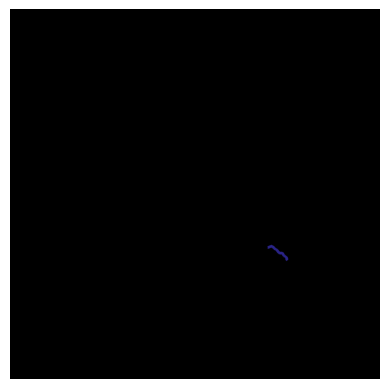

In [57]:

current_directory = os.getcwd()

imagePath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\images\image_2023-06-23_18-25-29-244708.png"
#maskPath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\images\image_2023-06-22_19-12-10-226058.png"
maskPath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\masks\mask_2023-06-23_18-25-29-244708.png"

myImage = Image.open(imagePath)
mask = Image.open(maskPath)
print(mask.size)
# convert the PIL Image into a numpy array
mask = np.array(mask)

# instances are encoded as different colors
obj_ids = np.unique(mask)
# first id is the background, so remove it
obj_ids = obj_ids[1:]

# split the color-encoded mask into a set
# of binary masks
masks = mask == obj_ids[:, None, None]
num_objs = len(obj_ids)

print(num_objs) 
print(obj_ids)

# Convert the `mask` array to RGB format
rgb_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
for i, obj_id in enumerate(obj_ids):
    rgb_mask[mask == obj_id] = np.random.randint(0, 256, size=3)

# Display the image with color tags
plt.imshow(rgb_mask)
plt.axis('off')
plt.show()

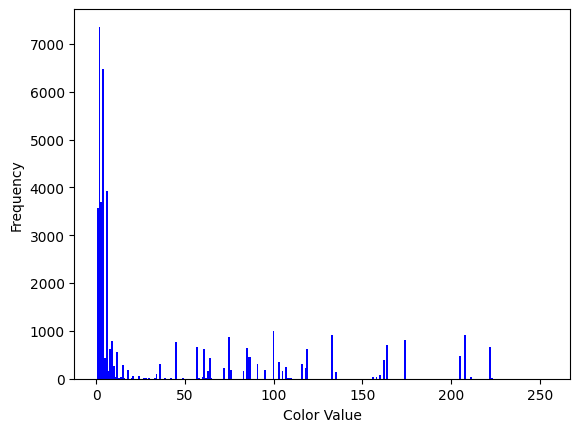

In [16]:
# Show all the colours in a histogram 
colors = mask.flatten()
histogram, bins = np.histogram(colors, bins=np.arange(1, 256))   # ignore background colour
plt.bar(bins[:-1], histogram, width=1, color='blue')
plt.xlabel('Color Value')
plt.ylabel('Frequency')
plt.show()